In [7]:
import numpy as np

def lup_solve(L, U, b):
    n = len(L)
    x = np.zeros(n)
    y = np.zeros(n)

    # Solve Ly = b (forward substitution)
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i, j] * y[j]

    # Solve Ux = y (backward substitution)
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i, j] * x[j]
        x[i] /= U[i, i]

    return x, y

# Example matrices L and U and vector b
L = np.array([[1, 0, 0],
              [0.2, 1, 0],
              [0.6, 0.5, 1]])

U = np.array([[5, 6, 3],
              [0, 0.8, -0.6],
              [0, 0, 2.5]])

b = np.array([8, 3, 7])

# Solve the system of equations
x, y = lup_solve(L, U, b)
print("Solution x (Forward Substitution):", x)
print("Solution y (Backward Substitution):", y)


Solution x: [-1.4  2.2  0.6]
Solution y: [8.  1.4 1.5]


Matrix size 100x100: Execution time = 0.005093 seconds
Matrix size 200x200: Execution time = 0.016194 seconds
Matrix size 300x300: Execution time = 0.030382 seconds
Matrix size 400x400: Execution time = 0.035195 seconds
Matrix size 500x500: Execution time = 0.048835 seconds
Matrix size 800x800: Execution time = 0.128545 seconds
Matrix size 1000x1000: Execution time = 0.200911 seconds
Matrix size 1400x1400: Execution time = 0.395021 seconds


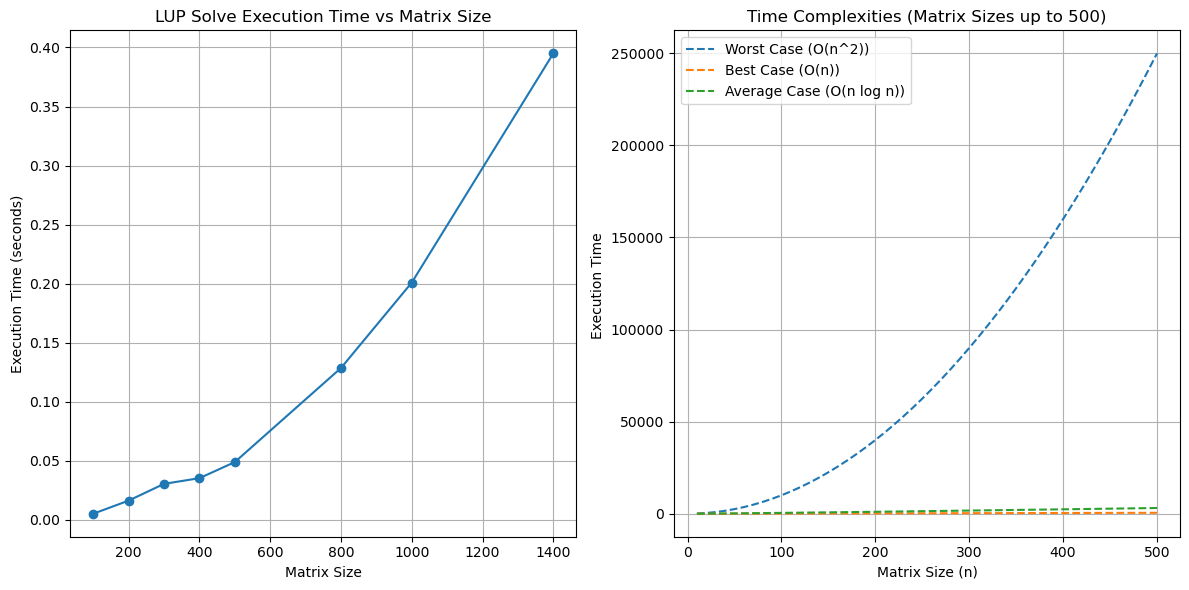

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lup_solve(L, U, b):
    n = len(L)
    x = np.zeros(n)

    # Solve Ly = b (forward substitution)
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i, j] * y[j]

    # Solve Ux = y (backward substitution)
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i, j] * x[j]
        x[i] /= U[i, i]

    return x

def benchmark_lup_solve(matrix_sizes):
    execution_times = []
    for size in matrix_sizes:
        L = np.random.rand(size, size)
        U = np.random.rand(size, size)
        b = np.random.rand(size)
        
        start_time = time.time()
        x = lup_solve(L, U, b)
        end_time = time.time()
        
        execution_times.append(end_time - start_time)
    return execution_times

# Function to calculate worst-case time complexity
def worst_case(n):
    return n**2

# Function to calculate best-case time complexity
def best_case(n):
    return n

# Function to calculate average-case time complexity
def average_case(n):
    return n*np.log(n)  # Just an example, could vary depending on the specific scenario

# Matrix sizes to benchmark
matrix_sizes = [100, 200, 300, 400, 500, 800, 1000, 1400]

# Benchmark LUP solve
execution_times = benchmark_lup_solve(matrix_sizes)

# Print execution times
for size, time_taken in zip(matrix_sizes, execution_times):
    print(f"Matrix size {size}x{size}: Execution time = {time_taken:.6f} seconds")

# Plot execution times
plt.figure(figsize=(12, 6))

# Plot execution times vs. matrix size
plt.subplot(1, 2, 1)
plt.plot(matrix_sizes, execution_times, marker='o')
plt.title('LUP Solve Execution Time vs Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)

# Plot theoretical complexities up to matrix size 500
matrix_sizes_up_to_500 = np.arange(10, 501, 10)
worst_case_times_up_to_500 = [worst_case(n) for n in matrix_sizes_up_to_500]
best_case_times_up_to_500 = [best_case(n) for n in matrix_sizes_up_to_500]
average_case_times_up_to_500 = [average_case(n) for n in matrix_sizes_up_to_500]

plt.subplot(1, 2, 2)
plt.plot(matrix_sizes_up_to_500, worst_case_times_up_to_500,label='Worst Case (O(n^2))', linestyle='--')
plt.plot(matrix_sizes_up_to_500, best_case_times_up_to_500, label='Best Case (O(n))', linestyle='--')
plt.plot(matrix_sizes_up_to_500, average_case_times_up_to_500, label='Average Case (O(n log n))', linestyle='--')
plt.title('Time Complexities (Matrix Sizes up to 500)')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Execution Time ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
